# Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')
print(df.head())

   Data As Of  Start Date    End Date Jurisdiction of Occurrence  Year  Month  \
0  09/27/2023  01/01/2020  01/31/2020              United States  2020      1   
1  09/27/2023  02/01/2020  02/29/2020              United States  2020      2   
2  09/27/2023  03/01/2020  03/31/2020              United States  2020      3   
3  09/27/2023  04/01/2020  04/30/2020              United States  2020      4   
4  09/27/2023  05/01/2020  05/31/2020              United States  2020      5   

   All Cause  Natural Cause  Septicemia  Malignant Neoplasms  ...  \
0     264681         242914        3687                52635  ...   
1     244966         224343        3324                48764  ...   
2     269806         247634        3669                51640  ...   
3     322424         300780        3366                48773  ...   
4     280564         255489        3085                49012  ...   

   Intentional Self-Harm (Suicide)  Assault (Homicide)  Drug Overdose  \
0                        

# Data Overview

In [2]:
print(df.shape)

(45, 31)


In [3]:
print(df.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Jurisdiction of Occurrence',
       'Year', 'Month', 'All Cause', 'Natural Cause', 'Septicemia',
       'Malignant Neoplasms', 'Diabetes Mellitus', 'Alzheimer Disease',
       'Influenza and Pneumonia', 'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System',
       'Nephritis, Nephrotic Syndrome and Nephrosis',
       'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',
       'Diseases of Heart', 'Cerebrovascular Diseases',
       'Accidents (Unintentional Injuries)', 'Motor Vehicle Accidents',
       'Intentional Self-Harm (Suicide)', 'Assault (Homicide)',
       'Drug Overdose', 'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'flag_accid', 'flag_mva',
       'flag_suic', 'flag_homic', 'flag_drugod'],
      dtype='object')


# Cleaning

In [4]:
missing = df.isnull().sum()
missing[missing > 0]
df.dropna(subset=['Year', 'Month', 'All Cause'], inplace=True)

In [5]:
df.drop(columns=[
    'flag_accid', 'flag_mva', 'flag_suic', 'flag_homic', 'flag_drugod',
    'Data As Of', 'Start Date', 'End Date'
], inplace=True)

In [6]:
# Ensure Year and Month are integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Create a 'Date' column for time series
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [7]:
# Rename long or inconsistent column names
df.columns = df.columns.str.strip().str.lower().str.replace(r'[^\w\s]', '').str.replace(' ', '_')

In [8]:
for col in df.columns[3:-1]:  # Skip first few meta columns
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df.dropna(inplace=True)
df.fillna(0, inplace=True)

In [19]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 37
Data columns (total 24 columns):
 #   Column                                                                                   Non-Null Count  Dtype         
---  ------                                                                                   --------------  -----         
 0   jurisdiction_of_occurrence                                                               38 non-null     object        
 1   year                                                                                     38 non-null     int32         
 2   month                                                                                    38 non-null     int32         
 3   all_cause                                                                                38 non-null     int64         
 4   natural_cause                                                                            38 non-null     int64         
 5   septicemia            

,jurisdiction_of_occurrence,year,month,all_cause,natural_cause,septicemia,malignant_neoplasms,diabetes_mellitus,alzheimer_disease,influenza_and_pneumonia,...,diseases_of_heart,cerebrovascular_diseases,accidents_(unintentional_injuries),motor_vehicle_accidents,intentional_self-harm_(suicide),assault_(homicide),drug_overdose,covid-19_(multiple_cause_of_death),covid-19_(underlying_cause_of_death),date
0,United States,2020,1,264681,242914,3687,52635,8234,11122,6656,...,60896,14113,15012.0,2914.0,4040.0,1708.0,6547.0,6,4,2020-01-01
1,United States,2020,2,244966,224343,3324,48764,7766,10444,6147,...,56851,12818,14497.0,2910.0,3672.0,1471.0,6435.0,25,20,2020-02-01
2,United States,2020,3,269806,247634,3669,51640,8433,11385,7579,...,60229,13742,15444.0,2874.0,3952.0,1693.0,7268.0,7175,6785,2020-03-01
3,United States,2020,4,322424,300780,3366,48773,9440,12307,5781,...,62285,13420,15493.0,2569.0,3480.0,1756.0,7938.0,65553,62014,2020-04-01
4,United States,2020,5,280564,255489,3085,49012,8361,10706,3612,...,56561,12776,18205.0,3365.0,3769.0,2067.0,9466.0,38330,35279,2020-05-01


# EDA

### Total Deaths Over Time

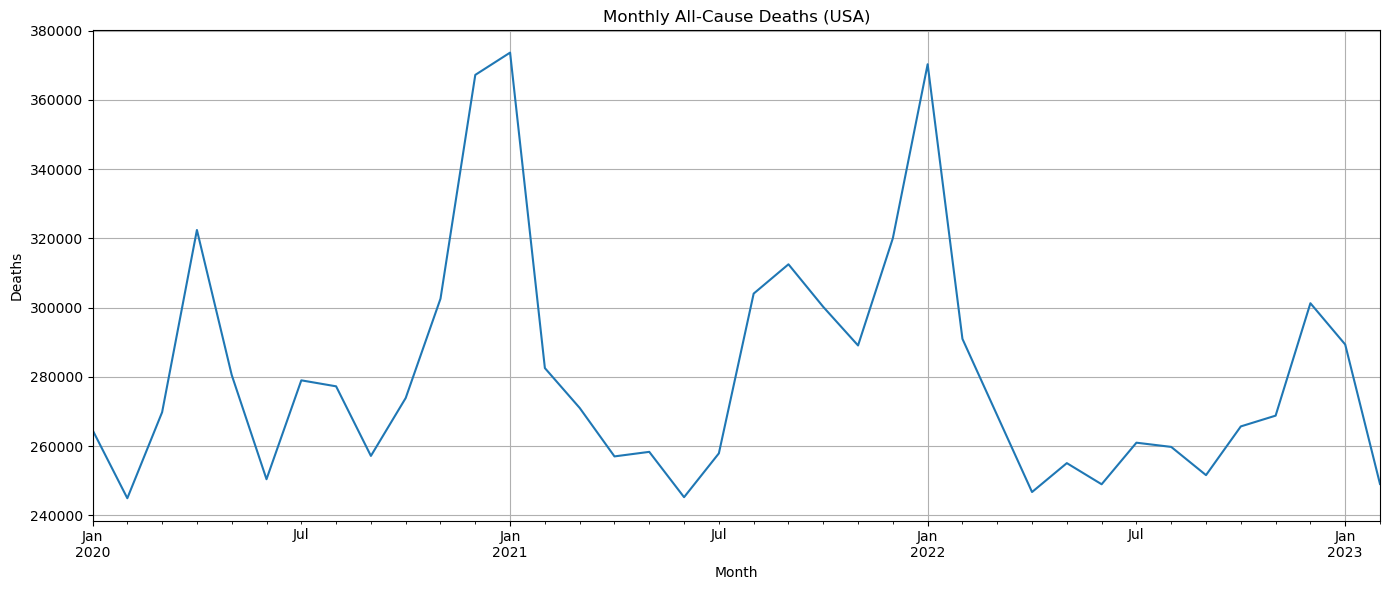

In [21]:
df_monthly = df.groupby("date")["all_cause"].sum()

plt.figure(figsize=(14,6))
df_monthly.plot()
plt.title("Monthly All-Cause Deaths (USA)")
plt.ylabel("Deaths")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 5 Causes of Death (by total count)

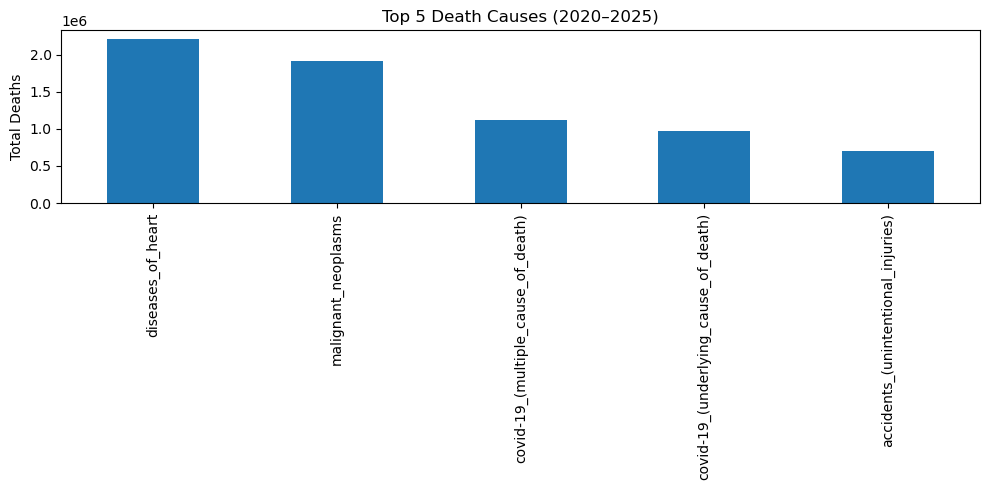

In [26]:
# Exclude meta columns
cause_cols = df.columns.difference(['year', 'month', 'jurisdiction_of_occurrence', 'date', 'all_cause', 'natural_cause'])

top_causes = df[cause_cols].sum().sort_values(ascending=False).head(5)
top_causes.plot(kind='bar', figsize=(10,5), title="Top 5 Death Causes (2020–2025)")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()

### Trends of Top Causes Over Time

<Figure size 1400x600 with 0 Axes>

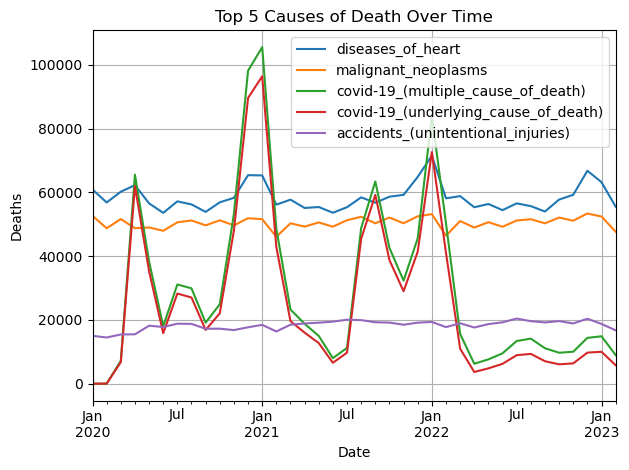

In [29]:
top_cols = top_causes.index.tolist()

df_top = df.groupby('date')[top_cols].sum()

plt.figure(figsize=(14,6))
df_top.plot()
plt.title("Top 5 Causes of Death Over Time")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

### COVID Deaths by State

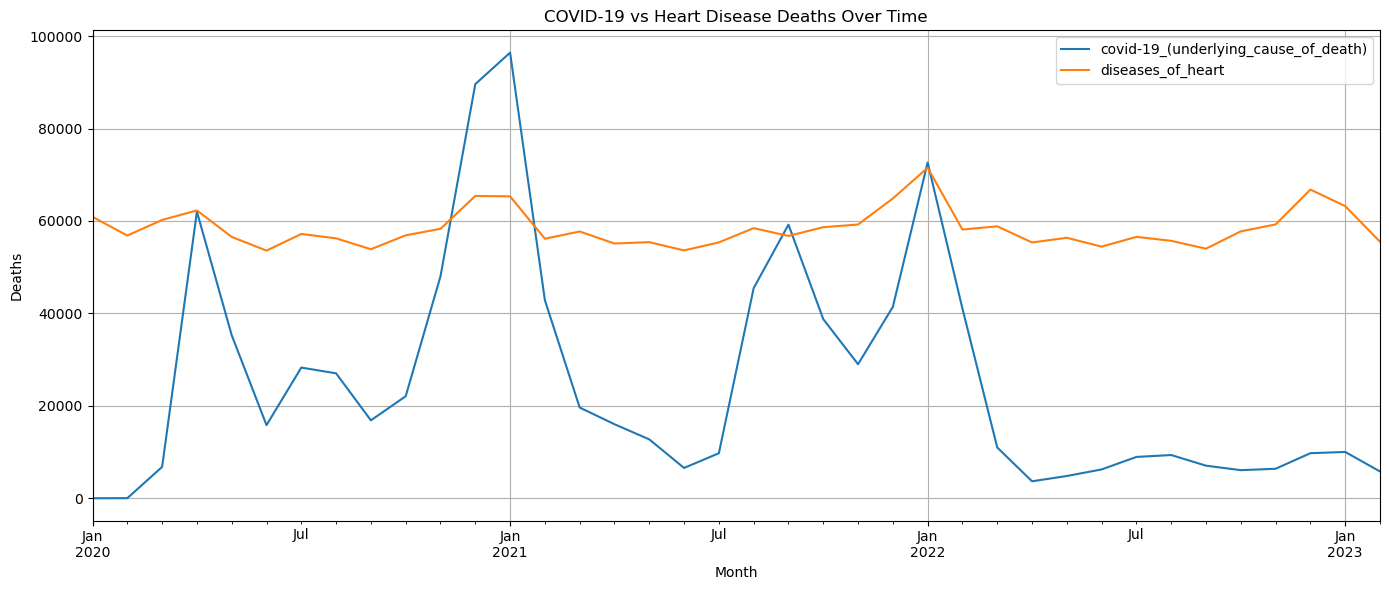

In [34]:
df_compare = df.groupby("date")[["covid-19_(underlying_cause_of_death)", "diseases_of_heart"]].sum()

df_compare.plot(figsize=(14,6), title="COVID-19 vs Heart Disease Deaths Over Time")
plt.xlabel("Month")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

### Monthly Seasonality

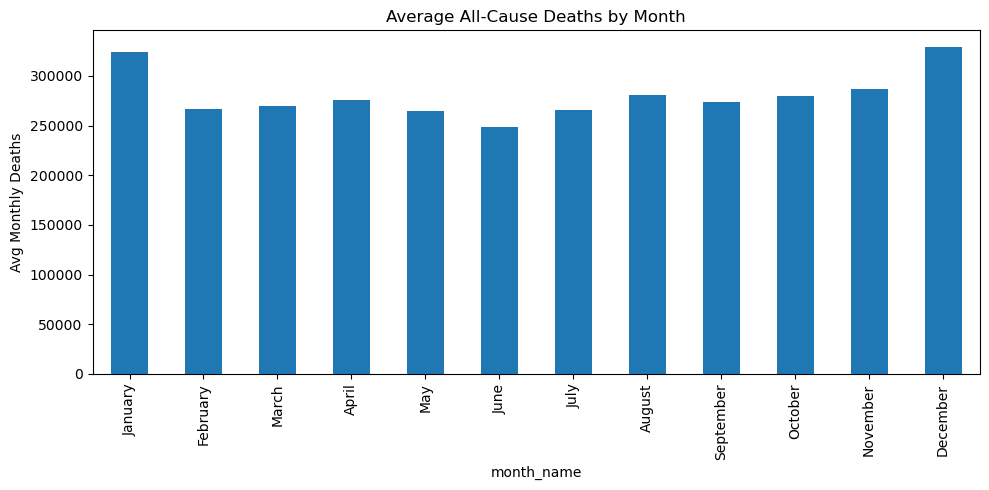

In [36]:
df["month_name"] = df["date"].dt.month_name()
season = df.groupby("month_name")["all_cause"].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

season.plot(kind='bar', figsize=(10,5), title="Average All-Cause Deaths by Month")
plt.ylabel("Avg Monthly Deaths")
plt.tight_layout()
plt.show()

In [39]:
summary = df.describe()
summary.to_csv("eda_summary_stats.csv")